<a href="https://colab.research.google.com/github/VanajaT/DDoS-Attack-SDN/blob/main/SDN(DDOS)_MLNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
df = pd.read_csv('dataset.csv')

features= ['dt','switch','pktcount','bytecount','dur','dur_nsec',	'tot_dur','flows','packetins','pktperflow','byteperflow','pktrate','Pairflow','Protocol','port_no','tx_bytes','rx_bytes']
df.Protocol[df.Protocol == 'UDP'] = 1
df.Protocol[df.Protocol == 'TCP'] = 2
df.Protocol[df.Protocol == 'ICMP'] = 3
x = df[features]
y = df.label

In [ ]:
print(df.shape)
df.head()

(104345, 20)


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,1,3,143928631,3917,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,1,4,3842,3520,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,1,3795,1242,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,2,3688,1492,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,3,3413,3665,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

BUILD THE MODEL

In [ ]:
model = Sequential()

model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = ('adam'), metrics = ['accuracy'])

BATCH SIZE = 58

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size=50)

Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.3045 - accuracy: 0.8508
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1207 - accuracy: 0.9502
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.0968 - accuracy: 0.9597
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.0815 - accuracy: 0.9675
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.0704 - accuracy: 0.9717
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.0650 - accuracy: 0.9740
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.0604 - accuracy: 0.9758
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.0561 - accuracy: 0.9775
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.0500 - accuracy: 0.9801
Epoch 10/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.048

In [ ]:
history = model.fit(x_test, y_test, epochs = 10, batch_size=50)
print('Accuracy on test set: {}'.format(model.evaluate(x_test, y_test)[1]))

Epoch 1/10
627/627 [==============================] - 1s 2ms/step - loss: 0.0445 - accuracy: 0.9837
Epoch 2/10
627/627 [==============================] - 1s 2ms/step - loss: 0.0432 - accuracy: 0.9832
Epoch 3/10
627/627 [==============================] - 1s 2ms/step - loss: 0.0425 - accuracy: 0.9838
Epoch 4/10
627/627 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9832
Epoch 5/10
627/627 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9840
Epoch 6/10
627/627 [==============================] - 1s 2ms/step - loss: 0.0406 - accuracy: 0.9849
Epoch 7/10
627/627 [==============================] - 1s 2ms/step - loss: 0.0387 - accuracy: 0.9854
Epoch 8/10
627/627 [==============================] - 1s 2ms/step - loss: 0.0422 - accuracy: 0.9845
Epoch 9/10
627/627 [==============================] - 1s 2ms/step - loss: 0.0409 - accuracy: 0.9841
Epoch 10/10
979/979 [==============================] - 1s 1ms/step - loss: 0.0208 - accuracy: 0.9922

[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
Confusion matrix, without normalization
[[18880   147]
 [   96 12181]]
True Negatives:  18880
False Positives:  147
False Negatives:  96
True Positives:  12181


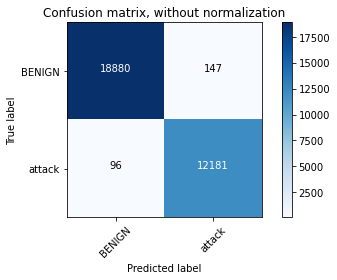

In [ ]:
# PREDICTING THE TEST SET
y_pred=model.predict(x_test)
y_pred =(y_pred>0.5)
print(y_pred)

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['BENIGN','attack'],
                      title='Confusion matrix, without normalization')
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)



In [ ]:
#Precision
Precision = tp/(tp+fp)
print("Precision {:0.3f}".format(Precision))

#Recall
Recall = tp/(tp+fn)
print("Recall {:0.3f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.3f}".format(f1))

Precision 0.988
Recall 0.992
F1 Score 0.990


In [ ]:
#Precision
Precision = tp/(tp+fp)
print("Precision {:0.3f}".format(Precision))

#Recall
Recall = tp/(tp+fn)
print("Recall {:0.3f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.3f}".format(f1))



Precision 0.979
Recall 0.984
F1 Score 0.981
